<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Hi Dimitri,

I have checked you work and left comments in such cells. Cells are of two types:

<div class="alert alert-block alert-danger">
<p> <strong> A red colored cell </strong> indicates that you need to improve or adjust part of the project above. </p>
</div>
<div class="alert alert-block alert-info">
<p> <strong> A blue colored cell </strong> indicates that no improvements are needed in the cells above. May include some suggestions and recommendations.</p>
</div>

Hope it all will be clear to you :)

You did a good job 😀. You  understand what you are doing and why, also can make right conclusions - which is great 👍.

The project is accepted :)

*Good luck!*

------------

## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/credit_scoring_eng.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Conclusion

After the first look at the data we can see that we have 12 columns with 21525 entries.  Types of the entries seem rights.  Both days_employed and total_income columns have the same number of null entries, I think this makes sense because people who have never worked don't have any income.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------

### Step 2. Data preprocessing

### Processing missing values

In [3]:
df['days_employed'].fillna(0,inplace=True)
df['total_income'].fillna(0,inplace=True)

### Conclusion

Here we make an assumption that the entries with null values in days_employed and total_income columns have never worked before, the other assumption I can think of is if those people just didn't want to provide any information, in which case it would be smarter to replace missing values with mean or median of the column.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------

### Data type replacement

In [4]:
df['days_employed']=df['days_employed'].astype(int).abs()
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,4024,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,5623,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,4124,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


### Conclusion

I replaced float data type in days_employed column with int data type and also took an absolute value of the data entries, because I think that it does not make much sense for days_employed value to be negative.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------

### Processing duplicates

In [5]:
df['education'].value_counts()

secondary education    13750
masters degree          4718
SECONDARY EDUCATION      772
Secondary Education      711
bachelor degree          668
MASTERS DEGREE           274
Masters Degree           268
primary education        250
Bachelor Degree           47
BACHELOR DEGREE           29
PRIMARY EDUCATION         17
Primary Education         15
academic degree            4
ACADEMIC DEGREE            1
Academic Degree            1
Name: education, dtype: int64

Values in education column have problems with upper and lower case letters, let's convert all of the strings to lower case.

In [6]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

secondary education    15233
masters degree          5260
bachelor degree          744
primary education        282
academic degree            6
Name: education, dtype: int64

In [7]:
df.duplicated().sum()

71

Here we can see that we have 71 duplicate rows, let's drop them.

In [8]:
df.drop_duplicates(keep=False,inplace=True)

### Conclusion

I fixed the education column and dropped duplicates in the table.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Good :)

------------

### Lemmatization

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

imported and created a lemmatizer

In [10]:
def lemmatize(data):
    words = nltk.word_tokenize(data)
    lemmas = ' '.join([lemmatizer.lemmatize(w,pos='n') for w in words])
    return lemmas

defined a function for lemmatization.

In [11]:
df['lemma_purpose'] = df['purpose'].apply(lemmatize)

In [12]:
def lemma_category(row):
    if "car" in row:
        return "car"
    if "hous" in row or "estat" in row or "prop" in row:
        return "property"
    if "wedding" in row:
        return "wedding"
    if "educat" in row or 'univer' in row:
        return"education"

In [13]:
df['purpose'] = df['lemma_purpose'].apply(lemma_category)

applied the function.

### Conclusion

Now our purpose column just contains one word describing the purpose.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Good :)

------------

### Categorizing Data

I think the only 2 columns we can characterize data with are age and total income. let's use the cut function.

In [14]:
df['categorized_age']=pd.cut(df['dob_years'],5)

In [15]:
df['categorized_income'] = pd.cut(df['total_income'],5)

### Conclusion

Here I categorized both the age and income data and split it in 5 parts.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

At the preprocessing step you need to study all the columns, i.e.  unique values in qualitative features and descriptive statistics of the quantitative features, before getting to the main part of the analysis. It will help you to find all possible errors in data and correct them before these errors distort you analysis.

------------

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [16]:
df.groupby('children')['debt'].agg('mean')

children
-1     0.021277
 0     0.075723
 1     0.092539
 2     0.094680
 3     0.081818
 4     0.097561
 5     0.000000
 20    0.105263
Name: debt, dtype: float64

Having -1 children does not seem right. let's delve deeper.

In [17]:
df['children'].value_counts()

 0     14038
 1      4798
 2      2049
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

There are just 47 cases where children are -1, because we have so much data I think that dropping those rows will not change much.

In [18]:
df.reset_index(drop=True);

now let's try to find relation again.

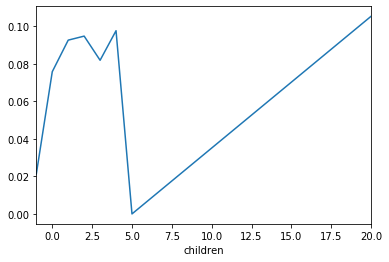

In [19]:
df.groupby('children')['debt'].agg('mean').plot()

### Conclusion

Most people in out dataset don't have children, and the mean of the dept column for those is approximetly 0.08 which means that only 8% of people those people have not payed loan on time. I can't deduct any important data from the graph eather, so I think that there is no connection.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

Please provide graph with title and name its axis :)

Problem with negative number of kids needs to be identified and solved at the preprocessing step.

------------

- Is there a relation between marital status and repaying a loan on time?

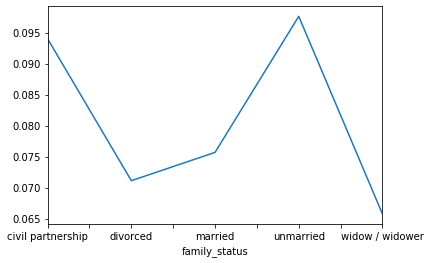

In [20]:
df.groupby('family_status')['debt'].agg('mean').plot()

### Conclusion

From the plot we can see that divorced, married and widow customers have higher chance of paying the loan compared to others.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

How can you explain these results?

Please provide graph with title and name its axis :)

------------

- Is there a relation between income level and repaying a loan on time?

In [21]:
df.groupby('categorized_income')['debt'].agg(['mean','count'])

,mean,count
categorized_income,,
"(-2265.604, 453120.806]",0.081794,21065
"(453120.806, 906241.611]",0.054608,293
"(906241.611, 1359362.417]",0.045455,22
"(1359362.417, 1812483.223]",0.000000,6
"(1812483.223, 2265604.029]",0.500000,2


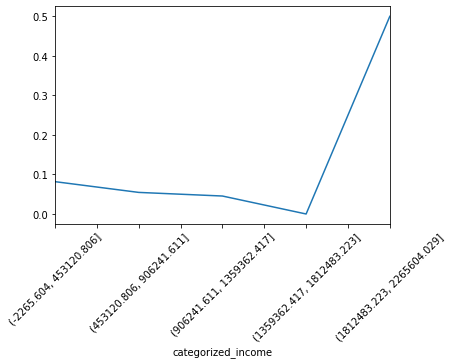

In [22]:
df.groupby('categorized_income')['debt'].agg('mean').plot(rot=45)

### Conclusion

Because there are not much people with really high incomes, I think that a spike in the graph is just noise, on the other hand I can see relation that as the income increases the chance of paying the debt back increases too.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

How can you explain these results?

Please provide graph with title and name its axis :)

------------

- How do different loan purposes affect on-time repayment of the loan?

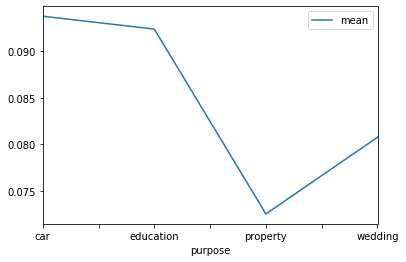

In [23]:
df.groupby('purpose')['debt'].agg(['mean']).plot()

### Conclusion

Car and education loans have higher chance of not getting payed back then property and wedding loans.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

How can you explain these results?

Please provide graph with title and name its axis :)

------------

### Step 4. General conclusion

After all I think that my analisys can have a lot of improvement, on the other hand bank should enforce their customers to fill out the forms with real values, for example- children can not be less then 0.

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  highlighted lemmas in the values of the loan purpose column;
- [x]  the lemmatization process is described;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.